In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from PIL import Image
#import seaborn as sns 
import matplotlib.pyplot as plt
#import plotly.express as px
#import plotly

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
MAIN_DIR = 'C:/Users/junda/OneDrive/Bureau/PROJET_ IMAGERIE/Medical_Imaging/brain-mri-images-for-brain-tumor-detection'
SEED = 40

In [3]:
os.listdir(MAIN_DIR)

['no', 'yes']

In [4]:
subdirs = os.listdir(MAIN_DIR)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(MAIN_DIR+'/'+subdir))} images")

no contains 98 images
yes contains 155 images


In [5]:
def load_images(folder):
    
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels

In [6]:
data, labels = load_images(MAIN_DIR)
data.shape, labels.shape

((253, 128, 128), (253,))

In [7]:
def plot_images(start, end):
    plt.figure(figsize=(22,8))
    for i in range(10):
        axs = plt.subplot(2,5, i+1)
        idx = np.random.randint(start, end)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('on')
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        plt.subplots_adjust(wspace=None, hspace=None)

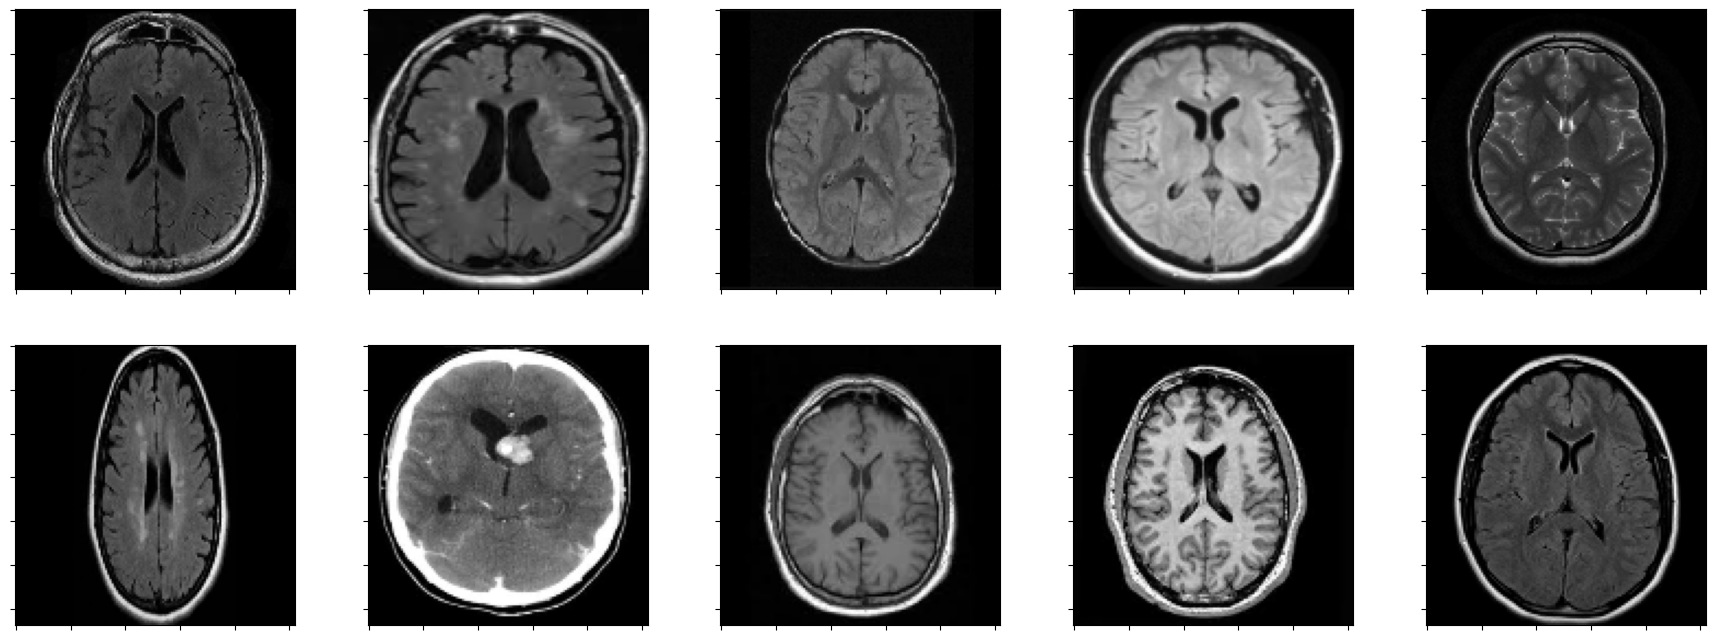

In [8]:
plot_images(0, 97) # 0 to 97 for images with no tumor

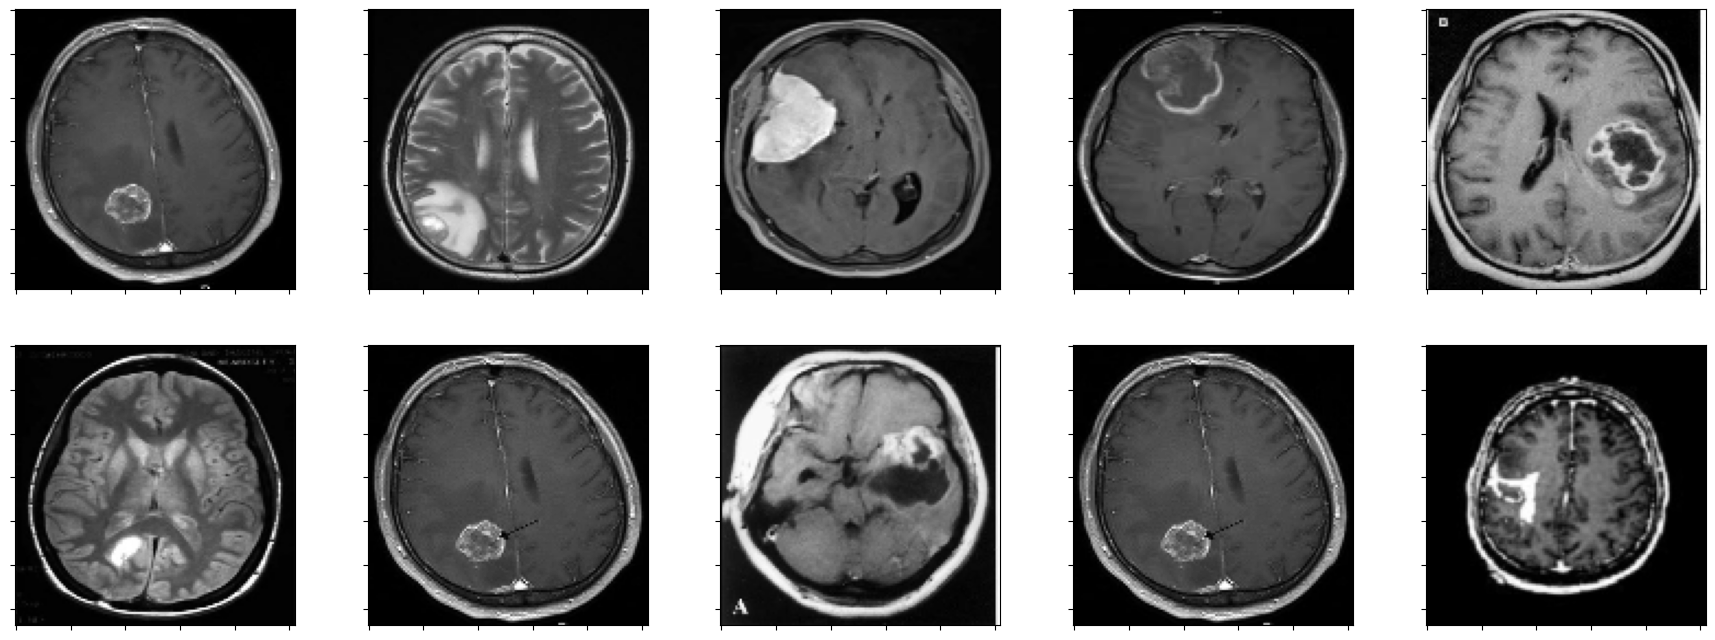

In [9]:
plot_images(98, 252) # 98 to 252 for images with tumor 

In [10]:
norm_data = data / 255. 
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

((253, 128, 128, 1),
 array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]))

In [11]:
tf.random.set_seed(SEED)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(128,128,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(norm_data, labels, epochs=10, validation_split=0.20)

Epoch 1/10
7/7 [==============================] - 8s 962ms/step - loss: 0.6631 - accuracy: 0.6139 - val_loss: 0.2924 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 6s 791ms/step - loss: 0.6127 - accuracy: 0.6337 - val_loss: 0.5790 - val_accuracy: 0.7059
Epoch 3/10
7/7 [==============================] - 6s 788ms/step - loss: 0.5035 - accuracy: 0.7574 - val_loss: 0.5190 - val_accuracy: 0.7255
Epoch 4/10
7/7 [==============================] - 6s 800ms/step - loss: 0.4729 - accuracy: 0.7822 - val_loss: 0.4465 - val_accuracy: 0.8235
Epoch 5/10
7/7 [==============================] - 6s 846ms/step - loss: 0.4447 - accuracy: 0.7970 - val_loss: 0.7508 - val_accuracy: 0.6275
Epoch 6/10
7/7 [==============================] - 6s 785ms/step - loss: 0.4472 - accuracy: 0.7772 - val_loss: 0.4266 - val_accuracy: 0.8627
Epoch 7/10
7/7 [==============================] - 6s 785ms/step - loss: 0.3725 - accuracy: 0.8218 - val_loss: 0.5526 - val_accuracy: 0.7255
Epoch 8/10
7/7 [====